# Pipeline -  это Lego, 

из которого вы **последовательно** складываете шаги обработки данных и моделей,

чтобы одновременно потом это обучить.

<img src="https://nationaltoday.com/wp-content/uploads/2019/01/national-lego-day.jpg" alt="drawing" width="300"/>

## Bonus: где взять трансформеры кроме sklearn
### sklearn-contrib 
open source project  `scikit-learn compatible projects` https://github.com/scikit-learn-contrib/





один из модулей - категориальные энкодеры

`!pip install category_encoders`

In [56]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd

### Скачаем понравившийся датасет из репозитория <a href="https://archive.ics.uci.edu/ml/datasets/"> UCI </a>



- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.\

- fnlwgt: continuous.

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- education-num: continuous.

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- sex: Female, Male.

- capital-gain: continuous.

- capital-loss: continuous.

- hours-per-week: continuous.

- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [9]:
import urllib.request

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
urllib.request.urlretrieve(url, '../data/adult.csv')

('../data/adult.csv', <http.client.HTTPMessage at 0x11db22ac8>)

In [26]:
data = pd.read_csv('../data/adult.csv', header=None)
                   
print(data.shape)
data.head().append(data.tail())

(32561, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [38]:
data['y'] = data[14].map({' <=50K': 0, ' >50K': 1})
data = data.drop([14], axis=1)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  y       32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


# Pipeline
`Pipeline`
`make_pipeline`

- В `Pipeline` передаем шаги как list of tuple с названием (сами придумываем) 
- в `make_pipeline` без названия
- последним шагом должна идти модель (`estimator`)
- до этого трансформеры в любом порядке

`Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit.` 


Еще пример

https://git.bd.msk.mts.ru/data_science/ds-tools/blob/master/examples/dssavenk_classifier_demo/build_evaluate_and_score_classifier.ipynb

In [53]:
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import TargetEncoder # bonus: sklearn-contrib

target_encoder = TargetEncoder(cols=data.select_dtypes(include=[object]).columns)
estimator = XGBClassifier(nthread=-1, n_estimators=1000, learning_rate=0.1)

pipeline = Pipeline([
    ('my_encoder', target_encoder),
    ('my_estimator', estimator)
])

In [51]:
pipeline

Pipeline(memory=None,
         steps=[('my_encoder',
                 TargetEncoder(cols=Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='object'),
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', min_samples_leaf=1,
                               return_df=True, smoothing=1.0, verbose=0)),
                ('my_clf',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, g...
                               interaction_constraints=None, learning_rate=0.1,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=1000,
                               n_jobs=None, nthread=-1, num_parallel_tree=None,
                               objec

In [52]:
pipeline.steps

[('my_encoder',
  TargetEncoder(cols=Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='object'),
                drop_invariant=False, handle_missing='value',
                handle_unknown='value', min_samples_leaf=1, return_df=True,
                smoothing=1.0, verbose=0)),
 ('my_clf',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=0.1, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=1000, n_jobs=None, nthread=-1,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None))]

In [54]:
pipeline.steps[-1]

('my_estimator',
 XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=0.1, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=1000, n_jobs=None, nthread=-1,
               num_parallel_tree=None, objective='binary:logistic',
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None))

# Early_stopping


- механизм обучения, который позволяет подобрать количество деревьев при фиксированном `learning_rate` и не переобучиться


- в процессе обучения сразу смотрим метрику на небольшой отложенной выборке и останавливаемся, когда она перестает изменяться (расти или падать)


- задаем количество деревьев, которые добавляем на каждом шаге и смотрим метрику

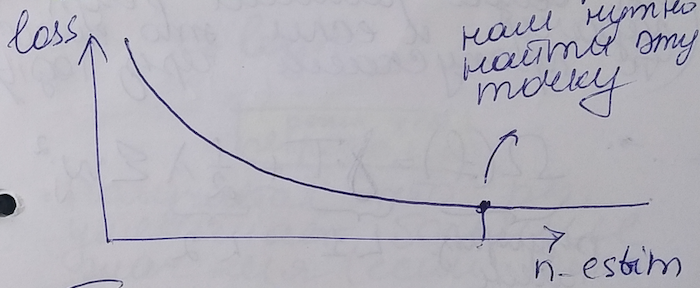


In [81]:
# данные на обучение и проверку метрик
X, X_test, y, y_test = train_test_split(data, data['y'],
                                         stratify=data['y'],
                                         test_size=0.3,
                                         random_state=43)

# отделяем от данных для обучения небольшой сэмпл для early_stopping
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 stratify=y,
                                                 test_size=0.1,
                                                 random_state=43)

# итого
X_train.shape, X_val.shape, X_test.shape

((20512, 15), (2280, 15), (9769, 15))

In [82]:
X_train = X_train.drop(['y'], axis=1)
X_val = X_val.drop(['y'], axis=1)
X_test = X_test.drop(['y'], axis=1)

In [83]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2633,55,Self-emp-inc,141807,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States
8157,59,Private,121912,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
23980,70,?,149040,HS-grad,9,Widowed,?,Not-in-family,White,Female,2964,0,12,United-States
30138,36,Private,190023,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States
7138,34,Private,118710,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States


### надо трансформировать X_val до обучения

In [84]:
from sklearn.base import clone

initial_steps = []
for i in pipeline.steps:
    initial_steps.append(clone(i[1]))

transformers_pipeline = make_pipeline(*initial_steps[:-1])
transformers_pipeline.fit(X_train, y_train)

X_val_transformed = transformers_pipeline.transform(X_val)

In [85]:
X_val_transformed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
29225,27,0.219521,183523,0.415865,13,0.044552,0.450352,0.102986,0.256016,0.30502,0,0,45,0.246935
27407,31,0.219521,50276,0.415865,13,0.106195,0.450352,0.102986,0.256016,0.30502,0,0,60,0.246935
30242,50,0.282948,89737,0.192249,10,0.449899,0.228604,0.451944,0.256016,0.30502,0,0,48,0.246935
15035,39,0.219521,322143,0.074074,8,0.449899,0.201396,0.451944,0.256016,0.30502,15024,0,70,0.246935
27509,34,0.282948,177639,0.240713,12,0.044552,0.228604,0.102986,0.256016,0.30502,0,0,40,0.246935


In [86]:
# передаем в fit параметры для early_stopping как: my_estimator__eval_set
pipeline.fit(X_train, y_train,
            my_estimator__eval_set=[(X_val_transformed, y_val)], 
            my_estimator__eval_metric='auc', 
            my_estimator__early_stopping_rounds=10, 
            my_estimator__verbose=10)

[0]	validation_0-auc:0.89184
Will train until validation_0-auc hasn't improved in 10 rounds.
[10]	validation_0-auc:0.90675
[20]	validation_0-auc:0.91086
[30]	validation_0-auc:0.91262
[40]	validation_0-auc:0.91550
[50]	validation_0-auc:0.91761
[60]	validation_0-auc:0.92002
[70]	validation_0-auc:0.92118
[80]	validation_0-auc:0.92219
[90]	validation_0-auc:0.92222
[100]	validation_0-auc:0.92204
Stopping. Best iteration:
[93]	validation_0-auc:0.92245



Pipeline(memory=None,
         steps=[('my_encoder',
                 TargetEncoder(cols=Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='object'),
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', min_samples_leaf=1,
                               return_df=True, smoothing=1.0, verbose=0)),
                ('my_estimator',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, g...
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=1000,
                               n_jobs=-1, nthread=-1, num_parallel_tree=1,
                               objective='binary:log

In [89]:
y_pred = pipeline.predict_proba(X_test)
y_pred

array([[8.6989391e-01, 1.3010608e-01],
       [9.6213484e-01, 3.7865162e-02],
       [6.3524073e-01, 3.6475927e-01],
       ...,
       [9.9921739e-01, 7.8263105e-04],
       [2.1483719e-01, 7.8516281e-01],
       [9.0983683e-01, 9.0163186e-02]], dtype=float32)

In [90]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred[:, 1])

0.9265833844660961